## K-Nearest Neighbors

In [1]:
!pip install scikit-learn==0.23.1

     |████████████████████████████████| 7.2 MB 7.1 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

### Preparing data

In [4]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


### Data analysis

In [5]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

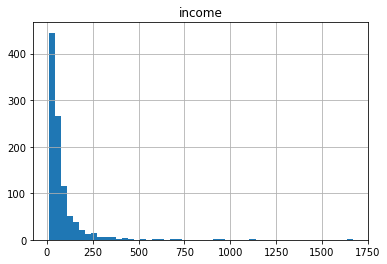

In [7]:
df.hist(column='income', bins=50)

In [25]:
X = df[df.columns[:len(df.columns) - 1]].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [30]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

### Normalize Data

Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [28]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

### Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [32]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


## Classification (KNN)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
k = 4

neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [36]:
y_predicted = neigh.predict(X_test)
y_predicted[0:5]

array([1, 1, 1, 3, 1])

In [37]:
from sklearn import metrics

In [38]:
train_accuracy = metrics.accuracy_score(y_train, neigh.predict(X_train))
test_accuracy = metrics.accuracy_score(y_test, y_predicted)
print("Train accuracy score: ", train_accuracy)
print("Test accuracy score: ", test_accuracy)

Train accuracy score:  0.565
Test accuracy score:  0.34


In [47]:
Ks = 20
mean_accuracy = np.zeros((Ks-1))
std_accuracy = np.zeros((Ks-1))

for k in range(1, Ks):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    y_predicted = neigh.predict(X_test)
    mean_accuracy[k - 1] = metrics.accuracy_score(y_test, y_predicted)
    std_accuracy[k - 1] = np.std(y_predicted == y_test) / np.sqrt(y_predicted.shape[0])

mean_accuracy

array([0.29 , 0.33 , 0.345, 0.34 , 0.32 , 0.315, 0.31 , 0.35 , 0.335,
       0.38 , 0.37 , 0.345, 0.34 , 0.335, 0.305, 0.345, 0.33 , 0.36 ,
       0.37 ])

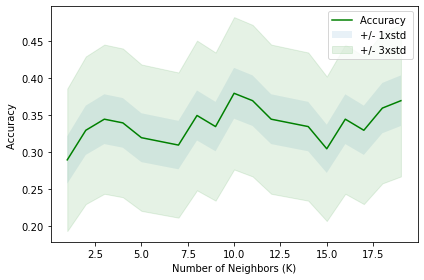

In [48]:
plt.plot(range(1,Ks),mean_accuracy,'g')
plt.fill_between(range(1,Ks),mean_accuracy - 1 * std_accuracy,mean_accuracy + 1 * std_accuracy, alpha=0.10)
plt.fill_between(range(1,Ks),mean_accuracy - 3 * std_accuracy,mean_accuracy + 3 * std_accuracy, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [49]:
max_accuracy = mean_accuracy.max()
best_k = mean_accuracy.argmax() + 1
print("The best accuracy was {0} when k = {1}".format(max_accuracy, best_k))

The best accuracy was 0.38 when k = 10
